In [1]:
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.2MB 32kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=b0791d3a5658023977d801704fe2074e428441e3711caa02e3d93d0df76496cb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [40]:
import cv2
import numpy as np
import face_recognition as fr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
upload=files.upload()

Saving jewelery.png to jewelery.png


In [5]:
from google.colab import files
upload=files.upload()

Saving picture.jpg to picture.jpg


In [41]:
jewel_img=cv2.imread("jewelery.png")
frame=cv2.imread("picture.jpg")
frame=cv2.resize(frame,(432,576))

# Returns a list of face landmarks present on frame
face_landmark_list=fr.face_landmarks(frame)

# For demo images only one person is present in image 
face_landmarks=face_landmark_list[0]

shape_chin=face_landmarks['chin']
# x,y cordinates on frame where jewelery will be added
x=shape_chin[3][0]
y=shape_chin[5][1]
# Jewelry width & height calculated using face chin cordinates
img_width=abs(shape_chin[3][0]-shape_chin[14][0])
img_height=int(1.02*img_width)

jewel_img = cv2.resize(jewel_img, (img_width,img_height), interpolation=cv2.INTER_AREA)
jewel_gray=cv2.cvtColor(jewel_img,cv2.COLOR_BGR2GRAY)
# All pixels greater than 230 will be converted to white and others will be converted to black
thresh,jewel_mask=cv2.threshold(jewel_gray,235,255,cv2.THRESH_BINARY)

# Convert to black the background of jewelry image
jewel_img[jewel_mask==255]=0

# Crop out jewelry area from original frame
jewel_area=frame[y:y+img_height,x:x+img_width]
# bitwise_and will convert all black regions in any image to black in resulting image
masked_jewel_area=cv2.bitwise_and(jewel_area,jewel_area , mask=jewel_mask)

# add both images so that the black region in any image will result in another image non black regions being rendered over that area
final_jewel=cv2.add(masked_jewel_area,jewel_img)
# replace original frame  jewel area with newly created jewel_area
frame[y:y+img_height,x:x+img_width]=final_jewel
# convert image to RGB format to read it in pillow library
rgb_img=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frame=Image.fromarray(rgb_img)
draw=ImageDraw.Draw(frame,'RGB')

draw.polygon(face_landmarks['left_eyebrow'], fill=(23, 26, 31, 100))
draw.polygon(face_landmarks['right_eyebrow'], fill=(23, 26, 31, 100))
draw.polygon(face_landmarks['top_lip'], fill=(255,69,0, 100))
draw.polygon(face_landmarks['bottom_lip'], fill=(255,69,0, 100))
#draw.polygon(face_landmarks['left_eye'], fill=(23, 26, 31, 100))
#draw.polygon(face_landmarks['right_eye'], fill=(23, 26, 31, 100))
# calculate x, y, radius for ellipse to be drawn between two eyebrows
x_center_eyebrow=face_landmarks['nose_bridge'][0][0]
y_center_eyebrow=face_landmarks['left_eyebrow'][4][1]
r = int( 1/4 * abs(face_landmarks['left_eyebrow'][4][0] - face_landmarks['right_eyebrow'][0][0]) )

draw.ellipse((x_center_eyebrow-r, y_center_eyebrow-r, x_center_eyebrow+r, y_center_eyebrow+r), fill =(128, 0, 128, 100))
frame.show()


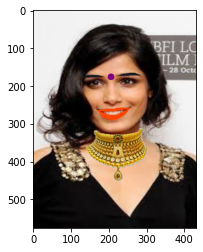

In [42]:
plt.imshow(frame)

In [43]:
frame = np.array(frame)
frame=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
cv2.imwrite('output.jpg',frame)

True

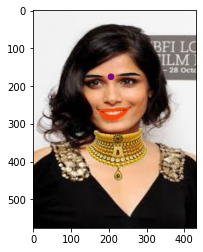

In [44]:
frame=cv2.imread('output.jpg')
frame=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
plt.imshow(frame)